# Astronomical Data Reduction and Analysis

<center><font size=6>[David Shupe](mailto:shupe@caltech.edu)<br><br>
IPAC<br><br>
2016-04-28

<center>
![astropy-powered](images/astropy_powered.png)

### Promised topics

* Astropy: vision, history and plans, and how JWST development fits in
* Accessing astronomical archives within Python
* Reading and manipulating tables and images
* Exploratory data analysis (visualization and statistics)
* World Coordinate Systems and coordinate handling
* Photutils for photometry

### Outline

* Vision, history and plans for Astropy
* How to read, manipulate, create and write tabular data
* Quantities and Units
* SkyCoords and how to cross-match catalogs
* How to read, manipulate, create and write FITS files
* World Coordinate System usage
* Plots of image and catalogs with APLpy
* The Ginga display toolkit and reference viewer
* Example: a simple image stacker
* Data exploration with Glue
* Exercises


### About me

* Staff scientist at IPAC since 1995 (LSST, ZTF, PTF, Herschel, Spitzer, WIRE)
* Attended first SciPy conferences at Caltech (2002-2003)
* Switched science workflow to Python in 2003
* Collaborator on Astropy
* Email me at [work](shupe@ipac.caltech.edu) or [Gmail](dave.shupe@gmail.com)
* Follow on [Github](https://github.com/stargaser) or [Twitter](http://twitter.com/stgazer)


# The Astropy Project

* A community effort to develop a core package for astronomy in Python
* Foster interoperability between Python astronomy packages
* Provide core functionality and _some_ common tools needed across astronomy
* Adhere to high standards for coding, testing and documentation
* Enable affiliated packages that can eventually be in the core

### Astropy origins

* First discussion on [Astropy mailing list](http://mail.scipy.org/pipermail/astropy) in June 2011
* First commit to [Astropy repository](https://github.com/astropy/astropy) in July 2011
* Coordination meeting at CfA in October 2011
   * Principally people from STScI and CfA
   * Also developers of astronomy packages
* First release (v0.1) in June 2012
* First long-term-support release (1.0) in February 2015
* Current coordinators are Perry Greenfield, Thomas Robitaille and Erik Tollerud

### How do I find out more about Astropy?

* For users:
   * Read about Astropy at [astropy.org](http://www.astropy.org) or peruse the [docs](http://docs.astropy.org)
   * Try the [Astropy Tutorials](http://www.astropy.org/astropy-tutorials/) or the [Scipy 2014 Astropy Workshop](http://astropy4scipy2014.readthedocs.org/en/latest/)
   * Report bugs and request features on the [issue tracker](https://github.com/astropy/astropy/issues)

### How do I find out more about Astropy?

* For the hard-core or cognoscenti:
   * Contribute code via [pull requests](https://github.com/astropy/astropy/pulls?q=is%3Aopen+is%3Apr)
   * View or propose major enhancements at the [Astropy Proposals for Enhancement](https://github.com/astropy/astropy/wiki/APE-Overview)
   * Join the [Astropy-dev mailing list](https://groups.google.com/forum/#!forum/astropy-dev)
   * Buy some [Astropy gear](http://fashion.astropy.org)

# Astropy core package functionality

* Units, quantities, constants
* Celestial coordinate representation and transformation
* WCS transformation
* Extensible framework for reading/writing ASCII tables
* FITS files and VO table handling
* High-level Table class with easy reading/writing
* Convolution/filtering utilities
* Cosmological calculations
* Model fitting framework
* Virtual Observatory support
* And more!

# Astropy affiliated packages


* Astronomy-related packages not in the Astropy core
* Can be:
   * Functionality under development for the core
   * More specialized functionality
   * Packages with incompatible licenses
* Adhere to Astropy coding, testing, and docs guidelines
* Use Astropy wherever possible (avoid duplication)
* Full list on [Astropy affiliated packages](http://www.astropy.org/affiliated/index.html)

__Stable affiliated packages__

* Montage-wrapper: Python interface to the Montage Astronomical Image Mosaic Engine
* Ginga: viewer and display toolkit for FITS files
* APLpy: publication-quality plots of astronomical images
* astroML: tools for machine learning and data mining in astronomy
* astroquery: online database querying
* ccdproc: reduction of optical/IR CCD data


__Affiliated packages in development__


* pyVO: access to the Virtual Observatory through Python
* photutils: photometry tools
* specutils: spectroscopic analysis utilities
* gammapy: a high-level gamma-ray astronomy data analysis package
* ccdproc: package for CCD data reductions
* imexam: a package for functionality like IRAF's `imexamine`

# Reading tabular data

### Astropy Table or Pandas?

__Benefits of Pandas__

* in wide usage outside astronomy
* inspired by R's `dataframe`
* lots of built-in statistics and data-indexing, cleaning functionality
* better integration with non-astronomy tools like Bokeh for plotting

__Benefits of Astropy.Table__

* strong concept of units for numerical quantities
* support for the many table formats in astronomy
* ...even handles IPAC table format
* better integration of FITS files

For today, we'll focus on Astropy's Table

# Reading a catalog from Vizier/CDS

In [1]:
from astropy.table import Table
import numpy as np

Here's how to read a Vizier catalog right over the Internet!
We won't do it here because it takes nearly 90 seconds to download (100 MB table).

Instead I'll read a shortened local copy from disk. Note I'm reading only selected columns, and I'm filling some zero values with NaNs.

In [2]:
%time hermes = Table.read('./data/hermes_xmm.dat.gz', format='ascii.cds',\
                readme='./data/hermes_xmm_ReadMe',\
                include_names=['Field','2HERMES','RAdeg','DEdeg','F250','E_F250',\
                                        'F350','E_F350','F500','E_F500'],\
                fill_values=[('0.0000000000e+00', np.nan)])

CPU times: user 1.43 s, sys: 73.1 ms, total: 1.51 s
Wall time: 1.51 s


Let's have a look at our table.

In [3]:
hermes

Field,2HERMES,RAdeg,DEdeg,F250,F350,F500,E_F250,E_F350,E_F500
,,deg,deg,mJy,mJy,mJy,mJy,mJy,mJy
str16,str16,float64,float64,float64,float64,float64,float64,float64,float64
L6-XMM-LSS-SWIRE,J020902.8-051422,32.262,-5.23951,86.578865,16.02702,4.8194284,9.910349,6.419097,6.2455964
L6-XMM-LSS-SWIRE,J020911.2-051548,32.29684,-5.26336,16.76191,22.353819,13.257082,9.74475,7.7637596,6.457824
L6-XMM-LSS-SWIRE,J020912.0-051322,32.30018,-5.2229,36.6278,31.870361,33.202618,9.770859,7.6594033,6.134122
L6-XMM-LSS-SWIRE,J020912.9-051457,32.30376,-5.24936,24.509861,19.822777,15.094943,9.727024,7.8311515,6.385604
L6-XMM-LSS-SWIRE,J020913.0-051555,32.30448,-5.26541,15.85878,22.244343,19.784485,9.709304,7.8645973,6.4733377
L6-XMM-LSS-SWIRE,J020914.5-051528,32.31081,-5.258,22.856884,15.978601,21.815115,9.794864,7.860395,6.412085
L6-XMM-LSS-SWIRE,J020914.7-051907,32.31162,-5.31873,36.4459,16.98123,16.313936,9.71687,7.7385383,7.4341683
L6-XMM-LSS-SWIRE,J020916.0-051312,32.31688,-5.22009,49.53829,32.246834,25.09545,9.675757,7.7450066,6.348919


Notice the fluxes have units in milliJanskys. This brings us to our next topic...

# Astropy Quantities and Units

Astropy has an excellent Units package, and a concept (actually a class) of Quantity as a Numpy array multiplied by a unit. The Table class understands units.

In [4]:
import astropy.units as u
print(u.arcsec)
print(u.uJy)
print(u.milliJansky)

arcsec
uJy
mJy


In [5]:
1.0*u.mJy == 1000.0*u.uJy

array(True, dtype=bool)

In this section we'll show how to transform a compound unit like Jy times microns (e.g. from integrating a Herschel-PACS spectrum) into Watts per square meter.

In [6]:
spectbl = Table.read('data/HD141569_PACS_blue_pointsource.fits', hdu=1)

In [7]:
spectbl 

wave,flag,segment,flux,weight
um,,,Jy,
float64,int32,int32,float64,float64
62.9464595203,0,0,4.34812113183,0.614677079844
62.9487765422,0,0,4.34814398236,0.614670619311
62.9510935642,0,0,2.5194414087,1.60764393282
62.9534105862,0,0,2.51945464918,1.60762703558
62.9557276081,0,0,2.60324775326,2.58484388241
62.958044162,0,0,2.60326143154,2.58481671946
62.9603607159,0,0,3.49504718028,2.20082245408
62.9626772698,0,0,2.73956807087,3.87316404873


Let's save the units in variables to save typing later on.

In [8]:
waveunit = spectbl['wave'].unit
fluxunit = spectbl['flux'].unit

Let's fit a Gaussian plus continuum to our spectrum.

In [9]:
from astropy.modeling import models, fitting
line = models.Gaussian1D(amplitude=14, mean=63.18, stddev=0.1)
cont = models.Polynomial1D(degree=1)
mymodel = line + cont
fitter=fitting.SLSQPLSQFitter()
my_fit = fitter(mymodel, spectbl['wave'],spectbl['flux'])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 39.2193580208
            Iterations: 39
            Function evaluations: 322
            Gradient evaluations: 39


In [10]:
my_fit

<CompoundModel0(amplitude_0=11.08713250284608, mean_0=63.18304651057923, stddev_0=0.009160751729809059, c0_1=-9.523999824565093, c1_1=0.20497075903340403)>

Let's plot our spectrum and our fit.

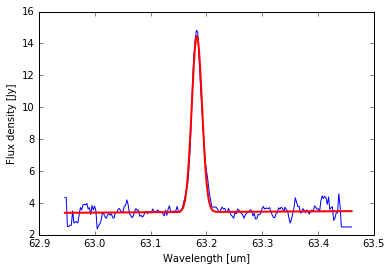

In [11]:
import matplotlib.pylab as plt
%matplotlib inline
plt.plot(spectbl['wave'],spectbl['flux'])
plt.plot(spectbl['wave'],my_fit(spectbl['wave']       ), 'r-', lw=2)
plt.xlabel('Wavelength [' + str(waveunit) + ']')
plt.ylabel('Flux density [' + str(fluxunit) + ']')

We can use the formula for area under a Gaussian to get an integrated line flux, which is the value we want to publish.

In [12]:
intensity = my_fit.amplitude_0*fluxunit*\
            my_fit.stddev_0*waveunit*np.sqrt(2*np.pi)
intensity

<Quantity 0.2545893810800624 Jy um>

Our integrated intensity has funny units...what do do?

### Equivalencies to the rescue

The Units package has [equivalencies](http://astropy.readthedocs.org/en/stable/units/equivalencies.html):

* parallax (between angle and length)
* angles as dimensionless units
* spectral (between wavelength and frequency)
* spectral flux density (between Fnu and Flambda)
* brightness temperature and flux density
* temperature and energy (via Boltzmann constant)

Let's convert our amplitude from Fnu to Flambda using the spectral density equivalency.

We have to give the wavelength of the line to `u.spectral_density`.

In [13]:
intensity = (my_fit.amplitude_0*fluxunit).to(u.W / u.m**2 / waveunit, \
              equivalencies=u.spectral_density(my_fit.mean_0*waveunit))*\
             (my_fit.stddev_0*waveunit)*np.sqrt(2*np.pi)
intensity

<Quantity 1.9118766234983097e-16 W / m2>

Here are more fun things you can do with the units of a Quantity.

In [14]:
intensity.decompose()

<Quantity 1.9118766234983097e-16 kg / s3>

In [15]:
intensity.si

<Quantity 1.9118766234983097e-16 kg / s3>

In [16]:
intensity.cgs

<Quantity 1.9118766234983098e-13 g / s3>

In [17]:
intensity.to(u.erg / u.cm**2 / u.s)

<Quantity 1.9118766234983098e-13 erg / (cm2 s)>

# Tips for reading a large table

* Table.read tries to guess the table type
* For a big table, it can guess for a long time, then time out
* Help Table.read by examining the file
* Also use fast read options

For this example, we'll use a cut-down version of Michael Rowan-Robinson's photo-z catalog (see [Readme](http://astro.ic.ac.uk/public/mrr/swirephotzcat/readmeSWIRErev) for the full catalog).

In [18]:
%%bash
gunzip -c data/mrrphotz_xmmbrite.dat.gz | head -3

# nidir     nidopt    ra           dec          s36         s45        s58        s8         s24        s70       s160       err36      err45      err58      err8       err24      err70     err160    am1      am2      am3      am4     am5       em1      em2      em3      em4      em5     am21     am22     am23     am25     am26      em21     em22     em23     em25     em26      am6      am7      am8      em6      em7      em8    mst  delmag  delmag1  j1   alz       err0   j2   alz2    av1     err1  n91  nbopt    amb2     alb   spectz0  nzclass0 nzref0  nir  alp1  alp2  alp3  alp4   errir3   alcirr    alsb    alagn    ala220  alir nirtem als70 als160 als350 als450 als850 als1250  al36   alm    sfr    almd
   61102  8082557   36.155159   -4.315720      56.64      48.32       0.00       0.00     789.42       0.00       0.00       1.23       1.09       0.00       0.00      21.98       0.00       0.00    25.62    25.53    24.01    22.82    22.24     0.26     0.21     0.06     0.03     0.05 

Next is my final line for reading in the stripped-down catalog -- after many iterations. Using the fast method which is much faster on the full 1.4 GB catalog.

In [19]:
%time mrrphotz = Table.read('data/mrrphotz_xmmbrite.dat.gz', format='ascii.fast_commented_header', \
                        data_start=1, header_start=0, \
                        include_names = ['nidir','nidopt','ra','dec','s36','s45','s58','s8','s24',\
                                         'nirtem','j2','alz2','err1','spectz0', 'als350','als450','n91','nbopt'],\
                        fill_values=[('0', np.nan),('0.00', np.nan), ('0.00000', np.nan, 'spectz0'),\
                                    ('-9.90',np.nan)])

CPU times: user 307 ms, sys: 37.6 ms, total: 345 ms
Wall time: 345 ms


If you wanted to download the full catalog (388 MB compressed, 1.4 GB uncompressed, 1.15M redshifts), use this instead:

<span font-size:10px>
```python
%time mrrphotz = Table.read('http://astro.ic.ac.uk/public/mrr/swirephotzcat/zcatrev12ff4.dat.gz',\
                        format='ascii.fast_commented_header', \
                        data_start=1, header_start=0, \
                        include_names = ['nidir','nidopt','ra','dec','s36','s45','s58','s8','s24',\
                                         'nirtem','j2','alz2','err1','spectz0', 'als350','als450','n91','nbopt'],\
                        fill_values=[('0', np.nan),('0.00', np.nan), ('0.00000', np.nan, 'spectz0'),\
                                    ('-9.90',np.nan)])
```
</span>

Let's have a look at our table.

In [20]:
mrrphotz

nidir,nidopt,ra,dec,s36,s45,s58,s8,s24,j2,alz2,err1,n91,nbopt,spectz0,nirtem,als350,als450
int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64
61022,8109063.0,36.45676,-4.20793,18.15,18.74,--,--,723.0,6,0.312,3.863,7,5.0,--,5,0.87,0.63
61054,8086048.0,36.198929,-4.30078,50.7,39.59,--,--,1266.79,7,0.304,4.689,7,5.0,--,5,1.07,0.83
51852,8042983.0,36.315109,-4.49507,55.75,57.11,--,--,532.2,1,0.44,7.0,5,3.0,--,5,1.25,1.02
196704,8071966.0,36.015442,-4.36293,15.43,10.78,--,--,669.26,7,0.262,15.198,6,5.0,--,4,-1.83,-2.12
55406,8051917.0,36.180408,-4.45352,18.31,22.74,--,--,896.41,5,0.484,0.901,4,2.0,--,5,1.42,1.26
68827,8139002.0,36.3354,-4.09032,75.31,54.31,--,--,540.41,5,0.268,0.991,5,5.0,--,2,0.38,0.1
36497,9154946.0,36.453449,-4.83704,16.72,20.39,--,--,693.29,5,0.44,4.358,5,3.0,--,5,1.36,1.13
35879,--,36.663898,-4.77636,24492.24,15445.91,11558.9,6672.21,542.12,6,0.01,4.58,7,5.0,--,5,-0.7,-1.05
183099,9192232.0,36.147141,-4.63743,14.04,--,--,--,607.91,2,0.196,0.524,5,4.0,--,5,0.31,-0.01


Let's fix up the units

In [21]:
for key in ['ra','dec']: mrrphotz[key].unit = u.deg

In [22]:
for key in ['s36','s45','s58','s8','s24']: mrrphotz[key].unit = u.microJansky

Predicted submm fluxes are log10(mJy). Let's fix those.

In [23]:
mrrphotz['pred350'] = np.round(10**mrrphotz['als350'],2)
mrrphotz['pred450'] = np.round(10**mrrphotz['als450'],2)
for key in ['pred350', 'pred450']: mrrphotz[key].unit = u.milliJansky

Let's delete the old columns, just to tidy up. (There's also `remove_column` and `remove_columns` methods.)

In [24]:
del mrrphotz['als350']
del mrrphotz['als450']

In [25]:
mrrphotz

nidir,nidopt,ra,dec,s36,s45,s58,s8,s24,j2,alz2,err1,n91,nbopt,spectz0,nirtem,pred350,pred450
,,deg,deg,uJy,uJy,uJy,uJy,uJy,,,,,,,,mJy,mJy
int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64
61022,8109063.0,36.45676,-4.20793,18.15,18.74,--,--,723.0,6,0.312,3.863,7,5.0,--,5,7.41,4.27
61054,8086048.0,36.198929,-4.30078,50.7,39.59,--,--,1266.79,7,0.304,4.689,7,5.0,--,5,11.75,6.76
51852,8042983.0,36.315109,-4.49507,55.75,57.11,--,--,532.2,1,0.44,7.0,5,3.0,--,5,17.78,10.47
196704,8071966.0,36.015442,-4.36293,15.43,10.78,--,--,669.26,7,0.262,15.198,6,5.0,--,4,0.01,0.01
55406,8051917.0,36.180408,-4.45352,18.31,22.74,--,--,896.41,5,0.484,0.901,4,2.0,--,5,26.3,18.2
68827,8139002.0,36.3354,-4.09032,75.31,54.31,--,--,540.41,5,0.268,0.991,5,5.0,--,2,2.4,1.26
36497,9154946.0,36.453449,-4.83704,16.72,20.39,--,--,693.29,5,0.44,4.358,5,3.0,--,5,22.91,13.49
35879,--,36.663898,-4.77636,24492.24,15445.91,11558.9,6672.21,542.12,6,0.01,4.58,7,5.0,--,5,0.2,0.09


# Coordinates and table matching

* Astropy contained SkyCoord class
* Can match in 2-D or 3-D (adding distances or redshifts)
* Understands Units (i.e. degrees)

We'll match our Herschel-HerMES and Spitzer-photz catalogs

In [26]:
from astropy.coordinates import SkyCoord
cherm = SkyCoord(ra=hermes['RAdeg'],dec=hermes['DEdeg'], frame='icrs')
cmrr = SkyCoord(ra=mrrphotz['ra'], dec=mrrphotz['dec'], frame='icrs')

In [27]:
%time idxmrr, idxhermes, d2d, d3d = cherm.search_around_sky(cmrr, 2*u.arcsec)

CPU times: user 127 ms, sys: 5.53 ms, total: 132 ms
Wall time: 131 ms


* Tables can be stacked vertically or horizontally.
* Here we want to join them horizontally (expand columns)

In [28]:
from astropy.table import hstack
joinedtbl = hstack([mrrphotz[idxmrr],hermes[idxhermes]])

In [29]:
joinedtbl

nidir,nidopt,ra,dec,s36,s45,s58,s8,s24,j2,alz2,err1,n91,nbopt,spectz0,nirtem,pred350,pred450,Field,2HERMES,RAdeg,DEdeg,F250,F350,F500,E_F250,E_F350,E_F500
,,deg,deg,uJy,uJy,uJy,uJy,uJy,,,,,,,,mJy,mJy,,,deg,deg,mJy,mJy,mJy,mJy,mJy,mJy
int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,str16,str16,float64,float64,float64,float64,float64,float64,float64,float64
56323,8061867.0,36.239571,-4.40839,28.32,32.45,--,38.89,680.13,8,0.204,1.352,5,5.0,--,2,1.74,0.83,L6-XMM-LSS-SWIRE,J022457.4-042430,36.2395,-4.40841,21.28767,27.841919,13.45905,9.693781,7.6748123,6.1806707
41348,9178562.0,36.437222,-4.72148,13.19,16.13,--,--,830.24,6,0.498,3.668,6,4.0,--,5,25.7,18.2,L6-XMM-LSS-SWIRE,J022544.9-044316,36.43715,-4.72135,15.342726,26.436335,20.021503,9.690067,7.673326,6.1709747
171106,9133357.0,36.11401,-4.94401,74.56,63.84,43.16,103.96,612.74,5,0.284,16.536,6,4.0,--,2,4.17,2.19,L6-XMM-LSS-SWIRE,J022427.3-045638,36.11379,-4.94393,7.897357,4.8360167,--,9.688193,7.6747127,6.5623503
54785,8065900.0,36.40015,-4.38958,16.67,21.02,--,--,837.72,4,0.426,0.054,4,2.0,--,5,33.11,18.62,L6-XMM-LSS-SWIRE,J022536.1-042321,36.40057,-4.38925,14.533223,28.678522,20.034195,9.703079,7.6650453,6.2493057
170803,9133259.0,36.132801,-4.94507,109.32,85.74,63.0,95.68,1181.53,5,0.286,56.062,9,9.0,--,2,7.24,3.89,L6-XMM-LSS-SWIRE,J022431.8-045640,36.1329,-4.94468,45.073654,28.517683,14.261786,9.700192,7.6780047,6.212393
29045,9133622.0,36.631069,-4.94397,42.33,53.92,54.98,87.7,1275.24,11,0.338,3.944,9,9.0,--,3,257.04,162.18,L6-XMM-LSS-SWIRE,J022631.4-045639,36.6311,-4.94438,12.65912,10.394847,5.12592,9.703374,7.6695166,6.1745763
29506,9134032.0,36.603642,-4.94176,60.15,55.07,58.01,--,554.66,7,0.314,8.525,11,9.0,--,2,4.57,2.63,L6-XMM-LSS-SWIRE,J022624.9-045630,36.60388,-4.94169,12.40548,8.426951,--,9.698725,7.6719623,6.1597524
24450,12144423.0,36.92968,-4.94284,123.65,96.93,132.15,295.96,2728.01,5,0.186,2.903,9,9.0,--,2,8.71,4.07,L6-XMM-LSS-SWIRE,J022743.0-045633,36.92937,-4.94264,95.223175,44.75096,34.271744,9.702167,7.6948514,6.318


What tests are done on coordinates?

Here's how to run the coordinates tests:

In [30]:
import astropy;astropy.test("coordinates")

============================= test session starts ==============================
platform darwin -- Python 3.5.1 -- py-1.4.30 -- pytest-2.7.3
rootdir: /Users/shupe/miniconda3/envs/course/lib/python3.5/site-packages/astropy/coordinates, inifile: 

Running tests with Astropy version 1.1.2.
Running tests in /Users/shupe/miniconda3/envs/course/lib/python3.5/site-packages/astropy/coordinates.

Date: 2016-04-20T14:49:21

Platform: Darwin-15.4.0-x86_64-i386-64bit

Executable: /Users/shupe/miniconda3/envs/course/bin/python

Full Python Version: 
3.5.1 |Continuum Analytics, Inc.| (default, Dec  7 2015, 11:24:55) 
[GCC 4.2.1 (Apple Inc. build 5577)]

encodings: sys: utf-8, locale: UTF-8, filesystem: utf-8
byteorder: little
float info: dig: 15, mant_dig: 15

Numpy: 1.11.0
Scipy: 0.17.0
Matplotlib: 1.5.1
h5py: 2.6.0
Pandas: 0.18.0

collected 771 items

../../miniconda3/envs/course/lib/python3.5/site-packages/astropy/coordinates/tests/test_angles.py ........................................
../../mi

0

# Reading FITS files: simple case

If you just want to read the header and data from a simple FITS file (simple meaning no extensions), you can use the `getdata` method of `astropy.io.fits`

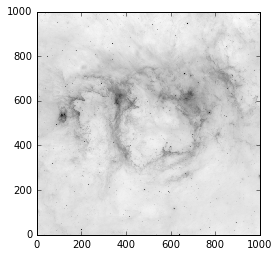

In [31]:
import astropy.io.fits as fits
image = fits.getdata('data/w5.fits')

# Some scaling for better display
from astropy.visualization import scale_image
import matplotlib.pylab as plt
%matplotlib inline
plt.imshow(scale_image(image,scale='log'),cmap='Greys')

You can get the header with the `getheader` method, or together with the data using `getheader`:

In [32]:
image, header = fits.getdata('data/w5.fits', header=True)
header

SIMPLE  =                    T / Written by SkyView Mon Sep 24 16:13:12 EDT 2012
BITPIX  =                  -32 / 4 byte floating point                          
NAXIS   =                    2 / Two dimensional image                          
NAXIS1  =                 1000 / Width of image                                 
NAXIS2  =                 1000 / Height of image                                
CRVAL1  =                43.46 / Reference longitude                            
CRVAL2  =                60.38 / Reference latitude                             
RADESYS = 'FK5     '           / Coordinate system                              
EQUINOX =               2000.0 / Epoch of the equinox                           
CTYPE1  = 'RA---TAN'           / Coordinates -- projection                      
CTYPE2  = 'DEC--TAN'           / Coordinates -- projection                      
CRPIX1  =                500.5 / X reference pixel                              
CRPIX2  =                500

# Reading multi-extension FITS files

For multi-extension FITS files, it is best to use the `open` method from `astropy.io.fits`.

All Herschel FITS files are multi-extension FITS. Here we read in a Herschel SPIRE 350um image.

In [33]:
import astropy.io.fits as fits
hdulist = fits.open('data/hspirepmw1342192088_afgl4092.fits.gz')

`hdulist` is an HDUList, essentially a list of Header Data Units.

In [34]:
hdulist

An HDUList has a `.info()` method which gives a better description of the contents

In [35]:
hdulist.info()

Filename: data/hspirepmw1342192088_afgl4092.fits.gz
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU     162   ()              
1    image       ImageHDU        53   (552, 552)   float64   
2    History     ImageHDU        23   ()              
3    HistoryScript  BinTableHDU     39   109R x 1C    [300A]   
4    HistoryTasks  BinTableHDU     46   80R x 4C     [1K, 27A, 1K, 9A]   
5    HistoryParameters  BinTableHDU     74   613R x 10C   [1K, 20A, 13A, 46A, 1L, 1K, 1L, 74A, 11A, 41A]   
6    error       ImageHDU        53   (552, 552)   float64   
7    coverage    ImageHDU        53   (552, 552)   float64   


An extension can be accessed by name or by number.

In [36]:
hdulist['image'].header

XTENSION= 'IMAGE   '           / Java FITS: Sat Sep 27 04:20:39 CEST 2014       
BITPIX  =                  -64                                                  
NAXIS   =                    2 / Dimensionality                                 
NAXIS1  =                  552                                                  
NAXIS2  =                  552                                                  
PCOUNT  =                    0 / No extra parameters                            
GCOUNT  =                    1 / One group                                      
LONGSTRN= 'OGIP 1.0'           / The OGIP long string convention may be used.   
COMMENT This FITS file may contain long string keyword values that are          
COMMENT continued over multiple keywords.  This convention uses the  '&'        
COMMENT character at the end of a string which is then continued                
COMMENT on subsequent keywords whose name = 'CONTINUE'.                         
          -------------- Her

Let's access the image data by number of the extension.

`scale_image` doesn't play nice with NaNs so let's employ some handy Numpy functions.

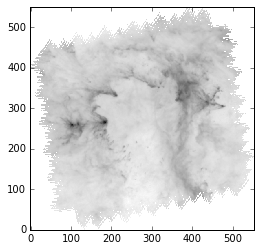

In [37]:
im = hdulist[1].data
plt.imshow(scale_image(im,scale='log',min_cut=np.nanmin(im),\
                       max_cut=np.nanmax(im)),cmap='Greys')

# World Coordinate Systems

Here we'll show how to create a WCS from a FITS header, and convert pixels to world coordinates.

In the next section, we'll create a WCS from scratch.

In [38]:
from astropy.wcs import WCS

In [39]:
w = WCS(hdulist[1].header)
hdulist['image'].header['OBJECT'] = 'M31' 

In [40]:
w.printwcs()

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 44.857117290539598  60.542432837562131  
CRPIX : 278.0  285.0  
NAXIS    : 552 552


Here's how to convert pixels to world coordinates.

* The second argument specifies the convention for the lower left pixel corner.
   * 0 is Numpy and C convention: (0,0) is first pixel
   * 1 is FITS and Fortran convention: (1,1) is first pixel
   * DS9 uses the FITS convention

In [41]:
import numpy as np
           
print(w.all_pix2world(np.array([[169.0,214.0],]),1))
# ds9 display for X=169.0, Y=214.0: alpha=45.46904, delta=60.34381

print(w.all_pix2world(np.array([[168.0,213.0],]),0))

[[ 45.4690432   60.34380633]]
[[ 45.4690432   60.34380633]]


* The calc_footprint method gives the corners in RA, Dec.
* The footprint_to_file method writes out a ds9 regions file.

In [42]:
w.calc_footprint()

array([[ 46.3841356 ,  59.74473731],
       [ 46.4580158 ,  61.27463166],
       [ 43.27354816,  61.27483468],
       [ 43.34662938,  59.74492806]])

# Creating and writing FITS files

We'll create a simple FITS file with a random image and a WCS.

In [43]:
data = np.random.uniform(size=(300,300))
myhdu = fits.PrimaryHDU(data=data)
myhdu.header['OBJECT'] = 'M31'

In [44]:
myhdu.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  300                                                  
NAXIS2  =                  300                                                  
EXTEND  =                    T                                                  
OBJECT  = 'M31     '                                                            

Let's create a minimal WCS and add it to the header.

In [45]:
from astropy import wcs
w = wcs.WCS(naxis=2)
w.wcs.crpix = [150.,150.]
w.wcs.cdelt = np.array([-1.0/3600.,1.0/3600.])
w.wcs.crval = [165.0,+58.5]
w.wcs.ctype = ["RA---TAN", "DEC--TAN"]

header = w.to_header()
for k in header.keys():
    myhdu.header[k] = header[k]
myhdu.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  300                                                  
NAXIS2  =                  300                                                  
EXTEND  =                    T                                                  
OBJECT  = 'M31     '                                                            
WCSAXES =                    2                                                  
CRPIX1  =                150.0                                                  
CRPIX2  =                150.0                                                  
CDELT1  = -0.00027777777777778                                                  
CDELT2  =  0.00027777777777778                                                  
CUNIT1  = 'deg     '        

In [46]:
myhdu.writeto('data/random_image_wcs.fits', clobber=True)

Now we'll write a multi-extension FITS with an image and a table.

In [47]:
myimagehdu = fits.ImageHDU(data=myhdu.data, header=myhdu.header, name='image')

Now make up some table data.

In [48]:
npts = 100
tdata = np.dstack((np.linspace(35.0, 70.0, num=npts),np.random.uniform(size=npts)))[0]
tbl = Table(tdata, names=('wavelength','flux'))
tbl['wavelength'].unit = u.um
tbl['flux'].unit = u.Jy
tbl

wavelength,flux
um,Jy
float64,float64
35.0,0.303447886458
35.3535353535,0.610916705634
35.7070707071,0.947601502381
36.0606060606,0.857707175445
36.4141414141,0.633198055094
36.7676767677,0.981334145271
37.1212121212,0.144411020732
37.4747474747,0.233934490018


In [49]:
mytablehdu = fits.BinTableHDU(data=tbl.as_array(),name='spectrum')
mytablehdu.header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   16 / length of dimension 1                          
NAXIS2  =                  100 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    2 / number of table fields                         
TTYPE1  = 'wavelength'                                                          
TFORM1  = 'D       '                                                            
TTYPE2  = 'flux    '                                                            
TFORM2  = 'D       '                                                            
EXTNAME = 'SPECTRUM'        

In [50]:
myhdulist = fits.HDUList([fits.PrimaryHDU(),myimagehdu,mytablehdu])
myhdulist.info()

Filename: (No file associated with this HDUList)
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       4   ()              
1    IMAGE       ImageHDU        23   (300, 300)   float64   
2    SPECTRUM    BinTableHDU     13   100R x 2C    ['D', 'D']   


In [51]:
myhdulist.writeto('data/multiext.fits', clobber=True)

**Note:** the `writeto` method will not ovewrite existing files by default.

To force the overwrite, give the additional parameter `clobber=True`.

# Astroquery affiliated package

The _astroquery_ package is a set of tools for querying astronomical web forms and databases.

Complementary to:
* astropy.vo (Astropy core)
* pyvo (Astropy affiliated package)

Check out the [Gallery of queries](http://astroquery.readthedocs.org/en/latest/gallery.html) for nice examples.

_Astroquery_ includes functions for querying IRSA catalogs.

In [52]:
from astroquery.irsa import Irsa
Irsa.print_catalogs()

glimpse2ep1a08                  GLIMPSE II Epoch 1 December '08 Archive (more complete, less reliable)
xmm_160_cat_s05                 SWIRE XMM_LSS Region 160um Spring '05 Spitzer Catalog
heritages100                    HERITAGE SMC PACS 100 micron Catalog
ssdf2                           SSDF IRAC Ch2 Catalog
sagecatmips24v2                 SAGE Winter '08 MIPS 24 um Epoch 1 and Epoch 2 Catalog  (more reliable)
xfls_i1v                        Extragalactic FLS IRAC Channel 1 Verification Field Catalog
acmccat                         ACMC Catalog
sage_cat_m24                    SAGE MIPS 24 um Epoch 1 and Epoch 2 Catalog  (more reliable)
cygx_cat                        Cygnus-X Catalog
xfls_i4m                        Extragalactic FLS IRAC Channel 4 Main Field Catalog
com_pccs2e_353                  Planck PCCS2E 353GHz Catalog (lower reliability)
servseni12                      SERVS ELAIS N1 2-band Catalog (highly reliable)
sdwfs_ch4_stack                 SDWFS Aug '09 DR1.1 IRAC 8.0

Let's read in an image and query an IRSA catalog in that image.

In [53]:
header = fits.getheader('data/xmm-lss-cutout-350um.fits')
w = wcs.WCS(header)
fov = w.calc_footprint()
fov 

array([[ 36.49006706,  -6.05642239],
       [ 36.48415013,  -2.852117  ],
       [ 33.39908956,  -2.85155939],
       [ 33.39132663,  -6.05523471]])

In [54]:
%time xmmtable = Irsa.query_region(catalog='servsxmmi2', spatial='Polygon', polygon=fov*u.deg)

CPU times: user 324 ms, sys: 5.23 ms, total: 329 ms
Wall time: 3.33 s


In [55]:
xmmtable

name,id,ra,dec,clon,clat,flux_aper_1,flux_aper_2,flux_aper_3,flux_aper_4,flux_aper_5,fluxerr_aper_1,fluxerr_aper_2,fluxerr_aper_3,fluxerr_aper_4,fluxerr_aper_5,snr_1,snr_2,snr_3,snr_4,snr_5,flux_iso,flux_auto,fluxerr_iso,fluxerr_auto,snr_iso,snr_auto,kron_radius,class_star,flags,mask,cov,csnr,poly,rel
,,deg,deg,,,microJy,microJy,microJy,microJy,microJy,microJy,microJy,microJy,microJy,microJy,,,,,,microJy,microJy,microJy,microJy,,,pixels,,,,,,,
object,object,float64,float64,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,float64,float64,int32,int32
SERVS1_J022039.96-051607.8,183557,35.166,-5.269,02h20m39.96s,-05d16m07.79s,88.599999999999994,94.400000000000006,104.3,114.7,119.09999999999999,0.5,0.5,0.59999999999999998,0.69999999999999996,1.0,175.30000000000001,189.19999999999999,183.90000000000001,155.09999999999999,122.40000000000001,114.7,113.90000000000001,0.90000000000000002,0.90000000000000002,123.90000000000001,121.59999999999999,3.5,0.38,3,0,21.137,310.80000000000001,1,1
SERVS1_J022046.92-051518.4,183992,35.195,-5.255,02h20m46.91s,-05d15m18.49s,2.6000000000000001,2.7000000000000002,2.8999999999999999,2.7999999999999998,2.2000000000000002,0.29999999999999999,0.29999999999999999,0.40000000000000002,0.59999999999999998,0.80000000000000004,8.0,7.9000000000000004,6.9000000000000004,4.7999999999999998,2.7999999999999998,1.8999999999999999,2.3999999999999999,0.20000000000000001,0.40000000000000002,8.5,6.7999999999999998,3.5,0.64000000000000001,0,130,30.792999999999999,10.800000000000001,1,1
SERVS1_J021828.22-052313.9,183703,34.618,-5.387,02h18m28.23s,-05d23m13.72s,4.0999999999999996,4.4000000000000004,4.9000000000000004,4.9000000000000004,4.7999999999999998,0.29999999999999999,0.29999999999999999,0.40000000000000002,0.59999999999999998,0.80000000000000004,12.4,12.6,11.699999999999999,8.5,6.2999999999999998,4.0999999999999996,4.4000000000000004,0.29999999999999999,0.59999999999999998,12.9,7.0999999999999996,4.6299999999999999,0.01,3,130,30.312999999999999,17.300000000000001,1,1
SERVS1_J022058.72-051435.1,183730,35.245,-5.243,02h20m58.72s,-05d14m35.06s,2.3999999999999999,2.2000000000000002,2.2999999999999998,2.1000000000000001,1.5,0.40000000000000002,0.40000000000000002,0.5,0.69999999999999996,0.90000000000000002,6.2999999999999998,5.5999999999999996,4.5999999999999996,3.2000000000000002,1.7,1.2,1.7,0.20000000000000001,0.29999999999999999,6.7000000000000002,5.0999999999999996,4.2199999999999998,0.52000000000000002,2,2,22.533000000000001,7.5999999999999996,1,1
SERVS1_J021852.57-052146.4,184063,34.719,-5.363,02h18m52.55s,-05d21m46.27s,2.8999999999999999,3.0,3.3999999999999999,3.6000000000000001,2.0,0.5,0.5,0.69999999999999996,0.90000000000000002,1.2,5.5999999999999996,5.5999999999999996,5.2000000000000002,3.8999999999999999,1.7,2.3999999999999999,2.6000000000000001,0.40000000000000002,1.0,6.5999999999999996,2.6000000000000001,4.8600000000000003,0.080000000000000002,2,0,13.025,7.7999999999999998,1,1
SERVS1_J022529.61-045909.0,183742,36.373,-4.986,02h25m29.62s,-04d59m08.68s,1.5,1.7,1.8,1.3999999999999999,0.80000000000000004,0.40000000000000002,0.40000000000000002,0.5,0.69999999999999996,0.90000000000000002,4.0999999999999996,4.2000000000000002,3.6000000000000001,2.0,0.90000000000000002,0.90000000000000002,1.3,0.20000000000000001,0.29999999999999999,4.5,4.0,3.5,0.26000000000000001,0,130,22.212,5.7000000000000002,1,1
SERVS1_J022305.20-050724.7,183897,35.772,-5.124,02h23m05.20s,-05d07m24.62s,2.5,2.5,2.2999999999999998,2.1000000000000001,1.5,0.40000000000000002,0.40000000000000002,0.5,0.69999999999999996,0.90000000000000002,6.5,6.2999999999999998,4.7000000000000002,3.2000000000000002,1.7,1.7,2.0,0.20000000000000001,0.40000000000000002,6.9000000000000004,4.5999999999999996,3.8799999999999999,0.20999999999999999,3,130,22.285,8.5999999999999996,1,1
SERVS1_J022121.38-051326.0,183331,

# APLpy for visualizing images and catalogs

* Python module for producing publication-quality plots of FITS data
* Based on matplotlib
* Can create output files in several graphical formats
* Make plots interactively or using scripts

INFO: Auto-setting vmin to  3.860e+02 [aplpy.core]
INFO: Auto-setting vmax to  1.066e+03 [aplpy.core]


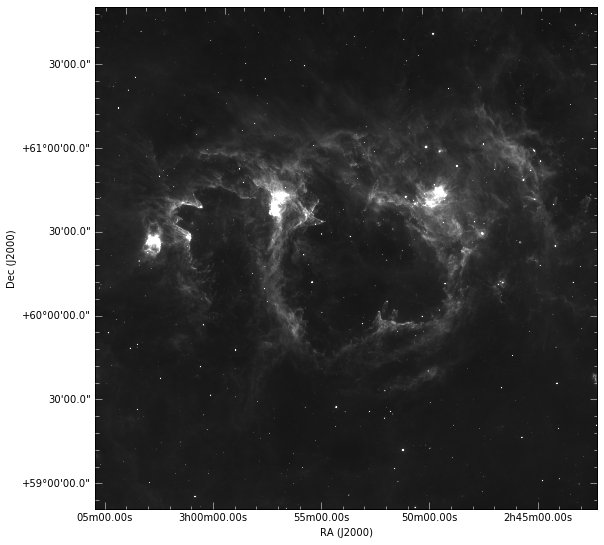

In [56]:
%matplotlib inline
import aplpy
fig = aplpy.FITSFigure('data/w5.fits')
fig.show_grayscale()

We'll read in a catalog and overlay it on the image, along with a grid and some contours.

In [57]:
w5tbl = Table.read('data/w5_wise.tbl', format='ascii.ipac')
w5tbl = w5tbl[w5tbl['w4snr'] > 30.0] 

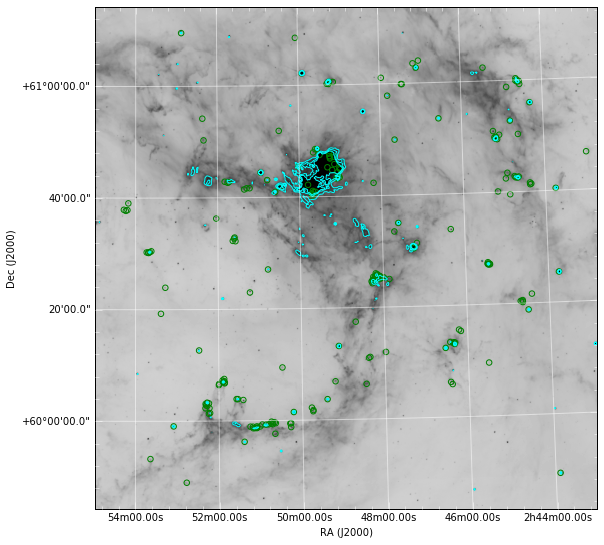

In [58]:
fig = aplpy.FITSFigure('data/w5.fits')
fig.show_grayscale(stretch='log', vmin=370, vmax=1000.0, invert=True)
fig.show_contour(colors='cyan', levels=[750, 850, 950])
fig.add_grid()
fig.show_markers(w5tbl['ra'], w5tbl['dec'], edgecolor='green',\
                 facecolor='none', marker='o', s=30, alpha=1.0)
fig.recenter(np.mean(w5tbl['ra']),np.mean(w5tbl['dec']), width=1.5, height=1.5)

In [59]:
fig.save('w5_overlay.pdf')

INFO: Auto-setting resolution to 71.6846 dpi [aplpy.core]


# Ginga for image display

* Toolkit for building viewers for scientific (esp. astronomical) data in Python
* Written and maintained by s/w engineers at the Subaru Telescope, NAOJ
* Image display object
* Plugin-based; highly customizable

Installing Ginga will put `ginga` in your command path (same location as python).

This is the "reference viewer" which we can run from the command line.

In [60]:
!ginga ./data/w5.fits

failed to set WCS package preference: 
failed to set FITS package preference: 
No method found matching 'gs_tap'
No method found matching 'ms_none'
No method found matching 'gs_swipe'
No method found matching 'ms_draw'
No method found matching 'ms_wheel'
No method found matching 'kp_poly_add'
No method found matching 'ms_cursor'
No method found matching 'kp_poly_del'
No method found matching 'kp_edit_del'
No method found matching 'gs_tap'
No method found matching 'ms_none'
No method found matching 'gs_swipe'
No method found matching 'ms_draw'
No method found matching 'ms_wheel'
No method found matching 'kp_poly_add'
No method found matching 'ms_cursor'
No method found matching 'kp_poly_del'
No method found matching 'kp_edit_del'


Ginga can be run from the notebook.

To show some of Ginga's interactive capabilities, we will follow an excerpt of [this online notebook](http://nbviewer.jupyter.org/gist/ejeschke/6067409).

* Start up a viewer
* Retrieve coordinates from it
* Draw a rectangle
* Find objects in the rectangle and overplot

In [61]:
%gui qt

ERROR: IPythonKernel._eventloop_changed is deprecated: use @observe and @unobserve instead.


In [62]:
# setup
from ginga.web.pgw import ipg
# Set this to True if you have a non-buggy python OpenCv bindings--it greatly speeds up some operations
use_opencv = False

server = ipg.make_server(host='localhost', port=9915, use_opencv=use_opencv)

In [63]:
# Start viewer server
# IMPORTANT: if running in an IPython/Jupyter notebook, use the no_ioloop=True option
server.start(no_ioloop=True)

In [64]:
# Get a viewer
# This will get a handle to the viewer v1 = server.get_viewer('v1')
v1 = server.get_viewer('v1')

In [65]:
# where is my viewer
v1.url

'http://localhost:9915/app?id=v1'

In [66]:
v1.load('data/xmm-lss-cutout-350um.fits')

In [67]:
v1.set_color_map('gray')

In [68]:
# Set cut level algorithm to use
v1.set_autocut_params('zscale', contrast=0.25)
# Auto cut levels on the image
v1.auto_levels()

In [69]:
# Example of embedding a viewer
v1.embed(height=650)

Now set a pan position by shift-clicking somewhere in the window.

In [71]:
dx, dy = v1.get_pan()
dx, dy

(546.4463919985405, 885.3936025664414)

In [72]:
img = v1.get_image()
img.pixtoradec(dx,dy)

(35.218547138578465, -4.008922662021502)

In [73]:
img.pixtoradec(dx, dy, format='str')

('2:20:52.451', '-4:00:32.12')

In [74]:
v1.set_autocut_params('zscale', contrast=0.1)
v1.auto_levels()

In [75]:
# set a color map on the viewer 
from ginga import cmap
v1.set_cmap(cmap.get_cmap('ramp'))

Add a drawing canvas

In [76]:
canvas = v1.add_canvas()
canvas.set_drawtype('rectangle')

In [77]:
canvas.deleteAllObjects()

Mark a rectangle on the image, including some objects.

In [78]:
# Find approximate bright peaks in a sub-area
from ginga.util import iqcalc
iq = iqcalc.IQCalc()

img = v1.get_image()
r = canvas.objects[0]
data = img.cutout_data(min(r.x1,r.x2), min(r.y1,r.y2), max(r.x1,r.x2), max(r.y1,r.y2))
peaks = iq.find_bright_peaks(data)
peaks[:20]

[(151.0, 0.0),
 (215.0, 3.0),
 (79.0, 5.0),
 (7.0, 6.0),
 (13.0, 16.0),
 (114.0, 19.0),
 (209.0, 19.0),
 (222.0, 19.0),
 (18.0, 21.0),
 (73.0, 23.0),
 (134.0, 26.0),
 (162.0, 27.0),
 (214.0, 40.0),
 (108.0, 44.0),
 (211.0, 44.0),
 (198.0, 48.0),
 (126.0, 51.0),
 (39.0, 55.0),
 (180.0, 55.0),
 (170.0, 62.0)]

In [79]:
# evaluate peaks to get FWHM, center of each peak, etc.
objs = iq.evaluate_peaks(peaks, data)
# how many did we find with standard thresholding, etc.
# see params for find_bright_peaks() and evaluate_peaks() for details
len(objs)

62

In [80]:
# example of what is returned
o1 = objs[0]
o1 

{'background': -0.00028574981667201443, 'pos': -0.2110006666086437, 'elipse': 0.02737645098567811, 'fwhm_y': 118.74669584573968, 'x': 151, 'y': 0, 'brightness': 147986.4105315089, 'fwhm': 83.9980532071012, 'objx': 151.40462690448456, 'skylevel': 39.999699962692496, 'objy': -290.8555260245469, 'fwhm_x': 3.2508630985321187, 'fwhm_radius': 15}

In [81]:
# pixel coords are for cutout, so add back in x1, y1 to get full data coords
# RA, DEC of first object
img.pixtoradec(min(r.x1,r.x2)+o1.objx, min(r.y1,r.y2)+o1.objy)

(35.57462198777441, -4.446919014626489)

In [83]:
# Draw circles around all objects
Circle = canvas.get_draw_class('circle')
for obj in objs:
    x, y = min(r.x1,r.x2)+obj.objx, min(r.y1,r.y2)+obj.objy
    if r.contains(x, y):
        canvas.add(Circle(x, y, radius=10, color='yellow'))
        
# set pan and zoom to center
v1.set_pan((r.x1+r.x2)/2, (r.y1+r.y2)/2)
v1.scale_to(2.0, 2.0)

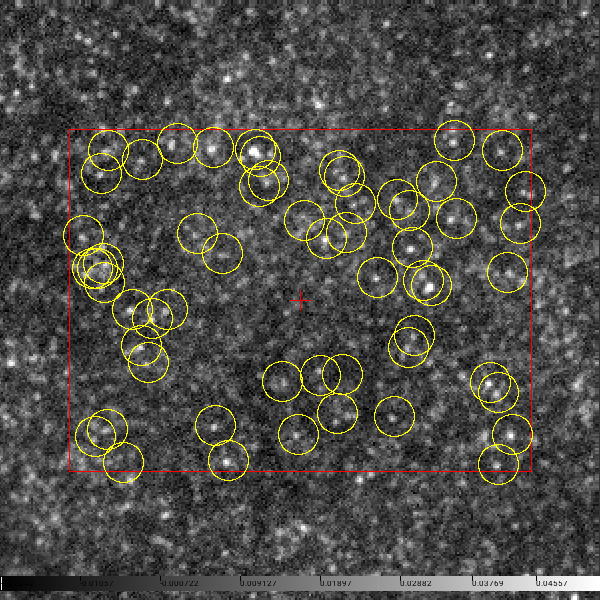

In [84]:
 v1.show() 

# Putting it all together: image stacker

In this section I will show how to use the WCS object and Numpy's handy arithmetic functions to stack "nondetections" in far-infrared images. 

Define a function to retrieve a subimage.

In [85]:
def getsubim(hdu,x,y,xsize,ysize):
    """ Get the subimage from an astropy.io.fits HDU.
    
        Parameters:
        -----------
        hdu - astropy.io.fits HDU object
        x,y - scalar pixel coordinates in FITS convention
        xsize,ysize - sizes in pixels of subimage to extract.
        
        Returns:
        --------
        subimage (which can be truncated, or None, if the subimage
            is not entirely contained within the image.
        """
    naxis1 = hdu.header['NAXIS1']
    naxis2 = hdu.header['NAXIS2']
    x1 = max(int(x - xsize/2 + 0.5 - 1),0)
    x2 = min(x1 + xsize,naxis1)
    y1 = max(int(y - ysize/2 + 0.5 - 1),0)
    y2 = min(y1 + ysize,naxis2)
    subim = hdu.section[y1:y2,:][:,x1:x2].copy()
    return(subim)

Define a stacking function that takes an HDU and coordinates.

In [86]:
def stackit(hdu, ra, dec, pixsize=11):
    """ Stack data from an HDU at the ra,dec world coordinates.
    
        Parameters:
        -----------
        hdu - astropy.io.fits HDU object
        ra - Numpy-like array of Right Ascensions
        dec - Numpy-like array of Declinations
        pixsize - integer for size of subimages to stack
        
        Returns:
        meanim - 2-D Numpy array of the mean of the stack
    """
    import astropy.io.fits as fits
    from astropy import wcs 
    import numpy as np 
    w = wcs.WCS(hdu.header)
    pixcoords = w.wcs_world2pix(np.dstack([ra,dec])[0], 1)
    stacklist = []
    for p in pixcoords:
        subim = getsubim(hdu, p[0],p[1],pixsize,pixsize)
        if (subim.shape == (pixsize, pixsize)):
            stacklist.append(subim)
    stack = np.array(stacklist)
    meanim = np.nanmean(stack,axis=0)
    return(meanim)

Let's use the 350 um HerMES image in the XMM-LSS field.

In [87]:
import astropy.io.fits as fits
hdulist = fits.open('data/xmm-lss-cutout-350um.fits')
hdu = hdulist[0]

Let's select positions from our joined table with 2.0 < photz < 2.5.

In [88]:
photz = 10**joinedtbl['alz2'] - 1.0
medztbl = joinedtbl[(photz > 2.0) & (photz < 2.5)]
medztbl

nidir,nidopt,ra,dec,s36,s45,s58,s8,s24,j2,alz2,err1,n91,nbopt,spectz0,nirtem,pred350,pred450,Field,2HERMES,RAdeg,DEdeg,F250,F350,F500,E_F250,E_F350,E_F500
,,deg,deg,uJy,uJy,uJy,uJy,uJy,,,,,,,,mJy,mJy,,,deg,deg,mJy,mJy,mJy,mJy,mJy,mJy
int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,str16,str16,float64,float64,float64,float64,float64,float64,float64,float64
41348,9178562.0,36.437222,-4.72148,13.19,16.13,--,--,830.24,6,0.498,3.668,6,4.0,--,5,25.7,18.2,L6-XMM-LSS-SWIRE,J022544.9-044316,36.43715,-4.72135,15.342726,26.436335,20.021503,9.690067,7.673326,6.1709747
173645,9149690.0,36.170509,-4.86273,29.68,44.33,--,--,1258.34,4,0.48,0.84,9,9.0,--,2,39.81,30.2,L6-XMM-LSS-SWIRE,J022440.9-045145,36.17042,-4.86269,1.380133,26.969507,20.460354,9.695851,7.6818285,6.1515474
173899,--,36.185032,-4.83245,34.48,53.34,51.76,-106.89,513.1,7,0.52,5.451,9,7.0,--,5,17.38,12.3,L6-XMM-LSS-SWIRE,J022444.3-044956,36.18491,-4.83241,11.901363,23.477953,16.202713,9.698731,7.67851,6.18488
173823,9157057.0,36.25959,-4.8261,16.05,22.12,--,--,590.16,7,0.53,5.24,9,7.0,--,2,14.79,10.96,L6-XMM-LSS-SWIRE,J022502.2-044934,36.25946,-4.82632,4.362939,22.721844,15.384255,9.706166,7.6610594,6.2273026
180519,9180227.0,36.127769,-4.71311,12.37,18.59,--,--,502.73,6,0.482,4.635,11,9.0,--,2,8.13,5.62,L6-XMM-LSS-SWIRE,J022430.5-044247,36.12745,-4.71323,0.9015691,--,--,9.711769,7.662849,6.1404977
46324,8015609.0,36.36755,-4.62132,17.05,19.94,--,--,1373.06,11,0.532,11.09,11,9.0,--,5,42.66,31.62,L6-XMM-LSS-SWIRE,J022528.1-043717,36.36715,-4.62165,51.51886,34.604027,21.79056,9.715719,7.6656036,6.174645
39261,8018131.0,36.89035,-4.60883,48.4,63.0,56.26,81.4,795.94,2,0.51,4.994,6,6.0,--,5,25.7,18.2,L6-XMM-LSS-SWIRE,J022733.6-043631,36.89022,-4.60882,13.37574,19.695372,10.644293,9.706758,7.756967,6.7307577
45588,8019124.0,36.471569,-4.60244,8.83,--,--,--,552.24,7,0.526,6.974,7,6.0,--,5,17.78,12.88,L6-XMM-LSS-SWIRE,J022553.1-043609,36.47165,-4.60273,--,6.99632,--,9.839487,7.6736603,6.261205


Let's stack on our medium-redshift positions!

In [89]:
myim = stackit(hdu, medztbl['ra'].data, medztbl['dec'].data, 21)

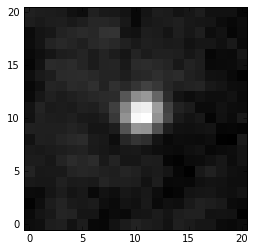

In [91]:
import matplotlib.pylab as plt
%matplotlib inline
plt.imshow(myim, cmap='gray') 

# Exploring data with Glue

Glue provides a visual interface based on the linking-and-brushing paradigm for data exploration. It makes use of many of the elements we've talked about. It's a bit experimental so see how you like it.

In [93]:
from glue import qglue
%gui qt

In [94]:
qglue(farir=joinedtbl)

DeprecationWarning: IPythonKernel._eventloop_changed is deprecated: use @observe and @unobserve instead.

# Exercises

Some ideas for exercises:

* Extend the stacker to make a standard deviation image.
* Extend the stacker to make a bootstrap error estimate.
* Download some interesting image and associated catalog, and use APLpy to display the image and the catalog sources.
* Use Glue to explore the same image and catalog.